## Installing PRAW: A Guide to Accessing Reddit's API

In [9]:
!pip install praw


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Reddit API Authentication

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="zC10-OcQWeZW-JaslA5glA",
    client_secret="pW5xIkxi2QcTspWUNmr_NJhAeb8m7A",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\abhil\AppData\Local\Temp\ipykernel_2204\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## New rising topics on selected word

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("cisco").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Nexus 93180yc-ex password recovery not working
1asirs9
nemaddux
1708115503.0
3
1.0
https://www.reddit.com/r/Cisco/comments/1asirs9/nexus_93180ycex_password_recovery_not_working/
0


## Selecting headlines of subreddits on selected topic

In [4]:
headlines = set()
for submission in reddit.subreddit("cisco").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

910


## Creating dataset

In [9]:
#Create a dataframe from the scrapped data 
cisco_df = pd.DataFrame(headlines)
cisco_df.head()

,0
0,VRF for LAN and Global for ISP/ cisco IOS XE
1,Cisco WS-C3750G-48TS-S - firmware license refu...
2,moh issue outband
3,Just swapped a failing 2960X with a 3850 and h...
4,Understanding an ip address if is private or p...


In [10]:
cisco_df.columns

RangeIndex(start=0, stop=1, step=1)

In [11]:
cisco_df.columns = ['Titles']

In [12]:
cisco_df.head()

,Titles
0,VRF for LAN and Global for ISP/ cisco IOS XE
1,Cisco WS-C3750G-48TS-S - firmware license refu...
2,moh issue outband
3,Just swapped a failing 2960X with a 3850 and h...
4,Understanding an ip address if is private or p...


In [13]:
cisco_df.Titles.duplicated().sum() 

0

## Cleaning headlines

In [14]:
#Cleaning the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
cisco_df["Titles"]= cisco_df["Titles"].apply(cleanTxt)

#Show the clean text
cisco_df.head()

,Titles
0,VRF for LAN and Global for ISP/ cisco IOS XE
1,Cisco WS-C3750G-48TS-S - firmware license refu...
2,moh issue outband
3,Just swapped a failing 2960X with a 3850 and h...
4,Understanding an ip address if is private or p...


In [15]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
cisco_df["Titles"]= worldcup_df["Titles"].apply(remove_emoji)

#Show the clean text
cisco_df.head()

,Titles
0,VRF for LAN and Global for ISP/ cisco IOS XE
1,Cisco WS-C3750G-48TS-S - firmware license refu...
2,moh issue outband
3,Just swapped a failing 2960X with a 3850 and h...
4,Understanding an ip address if is private or p...


In [16]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Getting polarity and insight

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cisco_df['Subjectivity'] = cisco_df['Titles'].apply(getSubjectivity)
cisco_df['Polarity'] = cisco_df['Titles'].apply(getPolarity)

#Now display data
cisco_df.head()

,Titles,Subjectivity,Polarity
0,VRF for LAN and Global for ISP/ cisco IOS XE,0.000000,0.000000
1,Cisco WS-C3750G-48TS-S - firmware license refu...,0.000000,0.000000
2,moh issue outband,0.000000,0.000000
3,Just swapped a failing 2960X with a 3850 and h...,0.436667,0.163333
4,Understanding an ip address if is private or p...,0.375000,0.000000


In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
cisco_df["Insight"] = cisco_df["Polarity"].apply(getInsight)

cisco_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,VRF for LAN and Global for ISP/ cisco IOS XE,0.000000,0.000000,Neutral
1,Cisco WS-C3750G-48TS-S - firmware license refu...,0.000000,0.000000,Neutral
2,moh issue outband,0.000000,0.000000,Neutral
3,Just swapped a failing 2960X with a 3850 and h...,0.436667,0.163333,Positive
4,Understanding an ip address if is private or p...,0.375000,0.000000,Neutral
5,Cisco nexus switch N3K C3548P-10GX reboot sudd...,0.500000,0.000000,Neutral
6,ENCC 330-440,0.000000,0.000000,Neutral
7,USB port on Cisco 9166 AP,0.000000,0.000000,Neutral
8,Duo MFA - Exclude everyone from MFA except def...,0.000000,0.000000,Neutral
9,Any trouble with Tenable scanner not able to s...,0.412500,-0.225000,Negative


In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Getting polarity and insight

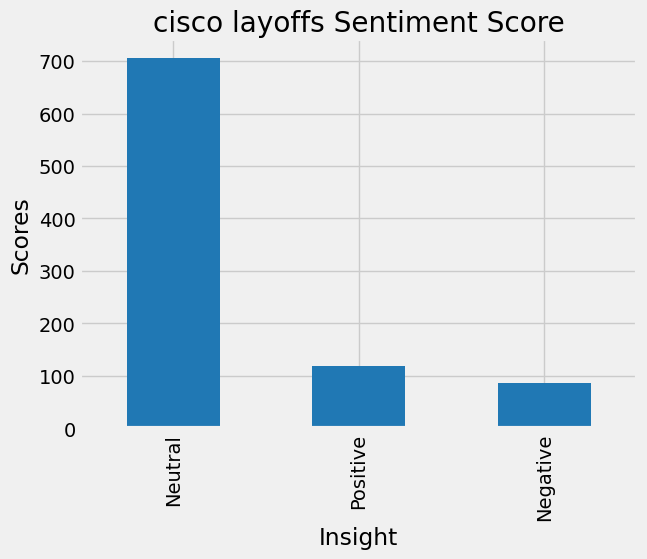

In [21]:
#Plot the values count of sentiment
plt.title("cisco layoffs Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cisco_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Creating WordCloud on word Worldcup

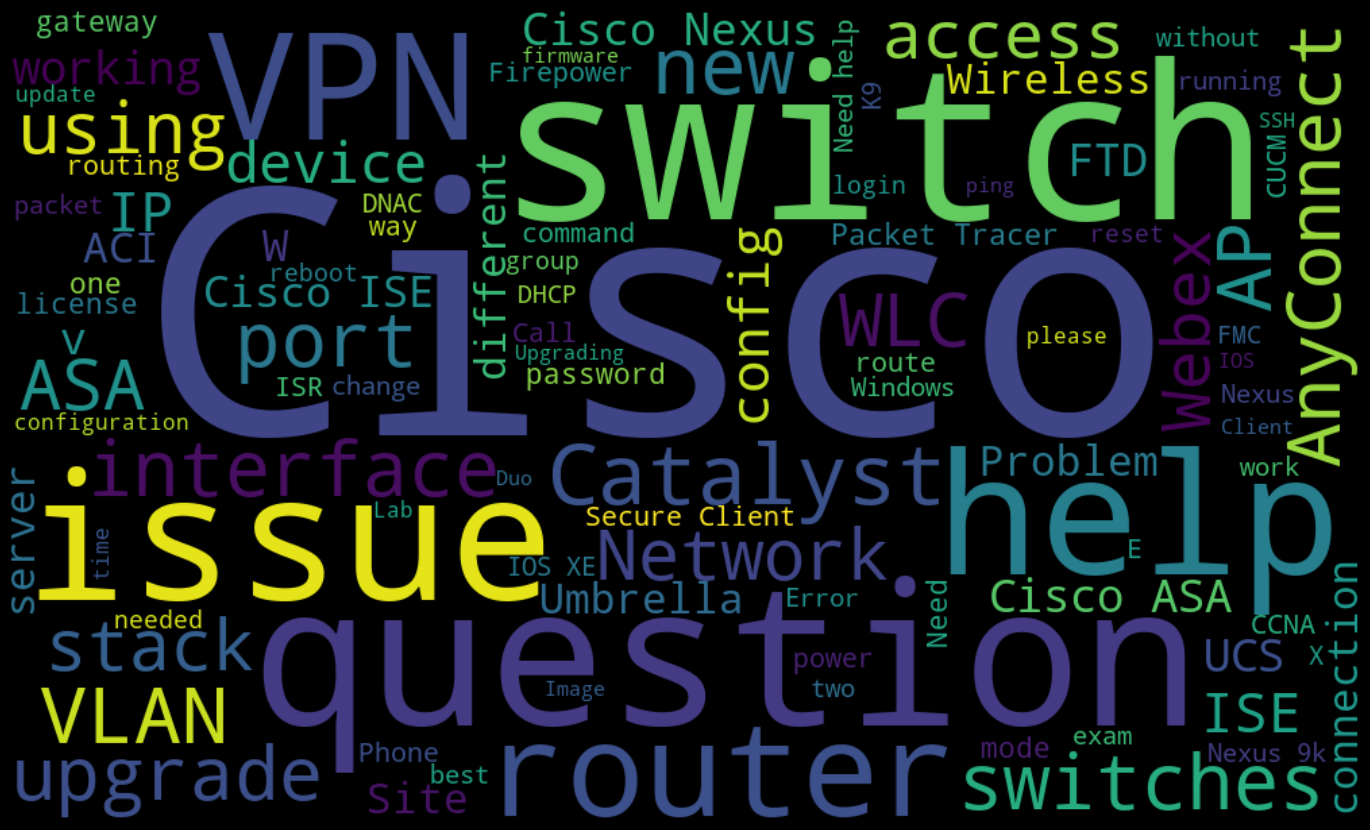

In [24]:
text = ' '.join( [twts for twts in cisco_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");